In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv("/content/prime - prime.csv.csv")

In [12]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Exploratory Data Analysis**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [8]:
data.shape

(8807, 12)

Data Cleaning

In [13]:
missing_value= data.isnull().sum()
percentage = 100 * data.isnull().sum() / len(data)
data_types = data.dtypes
missing_values_table = pd.concat([missing_value, percentage, data_types], axis=1)
miss_val = missing_values_table.rename(columns = {0 : 'Missing Values',1 : 'Percentage',2 : 'Data Types'})
miss_val.style.background_gradient(cmap = "plasma")


,Missing Values,Percentage,Data Types
show_id,0,0.000000,object
type,0,0.000000,object
title,0,0.000000,object
director,2634,29.908028,object
cast,825,9.367549,object
country,831,9.435676,object
date_added,10,0.113546,object
release_year,0,0.000000,int64
rating,4,0.045418,object
duration,3,0.034064,object


In [20]:
data.drop('show_id',inplace=True,axis=1) 

In [22]:
data['director'] = data['director'].replace(np.nan , "Unavailable")
data['cast'] = data['cast'].replace(np.nan , "Unavailable")
data['rating'] = data['rating'].fillna(data['rating'].mode()[0])

In [26]:
data.groupby('type').agg({'type':'count'})

,type
type,
Movie,6131
TV Show,2676


In [30]:
data['date_added']=pd.to_datetime(data['date_added'])
data['date_added_year']=pd.DatetimeIndex(data['date_added']).year
data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unavailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,TV Show,Blood & Water,Unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,TV Show,Jailbirds New Orleans,Unavailable,Unavailable,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,TV Show,Kota Factory,Unavailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0


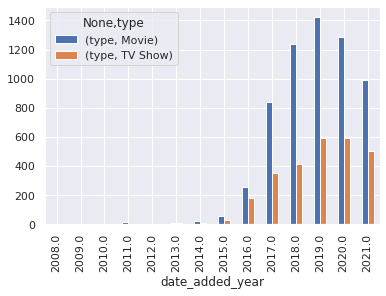

In [31]:
data.groupby(['date_added_year','type']).agg({'type':'count'}).unstack().plot(kind = "bar")

In [29]:
data['country'].isna().sum()

831

In [35]:
country=data[data['country'].isna()==False]
country['country'].isna().sum()

0

In [36]:
g=country.groupby('country').agg({'country':'count'})
g.apply(lambda x: x.sort_values(ascending=False)).head()

,country
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199


In [37]:
country=country[country['country']!='United States']
country=country[country['country']!='United Kingdom']


g_2=country.groupby('country').agg({'country':'count'})
g_2.apply(lambda x: x.sort_values(ascending=False)).head()


,country
country,
India,972
Japan,245
South Korea,199
Canada,181
Spain,145


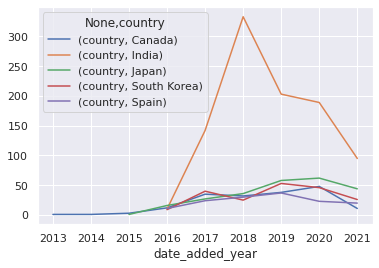

In [38]:
country_final=country[country['country'].isin(['India','Japan','South Korea','Canada','Spain'])]
country_final.groupby(['date_added_year','country']).agg({'country':'count'}).unstack().plot(kind = "line")

While india saw a boom after 2016, the other 4 countries did see a bit of an incraase too over time. however, not as much as we might have expected. nonetheless it looks like netflix is slowly increasing their number of foriegn filksm over time.

In [39]:
data['month']=pd.DatetimeIndex(data['date_added']).month
data.head()
#plt.scatter(netflix['date_added_year'], netflix['month'], marker='o')
data.groupby(['date_added_year','month']).agg({'month':'count'}).unstack()

month                                                   \
month             1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    
date_added_year                                                           
2008.0             1.0    1.0    NaN    NaN    NaN    NaN    NaN    NaN   
2009.0             NaN    NaN    NaN    NaN    1.0    NaN    NaN    NaN   
2010.0             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011.0             NaN    NaN    NaN    NaN    1.0    NaN    NaN    NaN   
2012.0             NaN    1.0    NaN    NaN    NaN    NaN    NaN    NaN   
2013.0             NaN    NaN    1.0    NaN    NaN    NaN    NaN    1.0   
2014.0             2.0    2.0    NaN    2.0    NaN    1.0    1.0    1.0   
2015.0             1.0    4.0    5.0    5.0    6.0    6.0    7.0    2.0   
2016.0            43.0   15.0   17.0   22.0   13.0   18.0   28.0   34.0   
2017.0            72.0   82.0  125.0   93.0   86.0   94.0   79.0  115.0   
2018.0           129.0   87.0  173.0  115.0   97.0   78.0  152.0  164.0   
2019.0           153.0  148.0  172.0  162.0  139.0  168.0  157.0  131.0   
2020.0           205.0  114.0  137.0  177.0  157.0  156.0  146.0  129.0   
2021.0           132.0  109.0  112.0  188.0  132.0  207.0  257.0  178.0   

                                             
month             9.0    10.0   11.0   12.0  
date_added_year                              
2008.0             NaN    NaN    NaN    NaN  
2009.0             NaN    NaN    1.0    NaN  
2010.0             NaN    NaN    1.0    NaN  
2011.0             1.0   11.0    NaN    NaN  
2012.0             NaN    NaN    1.0    1.0  
2013.0             2.0    3.0    2.0    2.0  
2014.0             1.0    4.0    4.0    6.0  
2015.0             7.0   14.0    4.0   21.0  
2016.0            48.0   51.0   44.0   96.0  
2017.0           113.0  126.0   85.0  118.0  
2018.0           124.0  191.0  154.0  185.0  
2019.0           123.0  193.0  255.0  215.0  
2020.0           168.0  167.0  154.0  169.0  
2021.0           183.0    NaN    NaN    NaN

In [40]:
data['diff_year']=data['date_added_year']-data['release_year']
data[data['diff_year']>0]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,month,diff_year
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unavailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,1.0
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,28.0
16,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",Unavailable,NaN,2021-09-22,2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...,2021.0,9.0,1.0
17,TV Show,Falsa identidad,Unavailable,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,2021-09-22,2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...,2021.0,9.0,1.0
21,TV Show,Resurrection: Ertugrul,Unavailable,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,2021-09-22,2018,TV-14,5 Seasons,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...,2021.0,9.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0,12.0
8803,TV Show,Zombie Dumb,Unavailable,Unavailable,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,7.0,1.0
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0,10.0
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0,14.0


In [44]:
netflix_genre=list(data['listed_in'])

empty=[]

for x in netflix_genre:
    temp=x.split(', ')
    for y in temp:
        empty.append(y)

empty=pd.DataFrame(empty)
empty.columns=['genre']
group=empty.groupby('genre').agg({'genre':'count'})
group.apply(lambda x: x.sort_values(ascending=False))

,genre
genre,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641


In [45]:
data.groupby(['date_added_year']).agg({'date_added_year':'count'})

,date_added_year
date_added_year,
2008.0,2
2009.0,2
2010.0,1
2011.0,13
2012.0,3
2013.0,11
2014.0,24
2015.0,82
2016.0,429
